<a href="https://colab.research.google.com/github/VLCarolina/Smart-Trash-Can/blob/main/SmartTrashCan_Alexnet_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from google.colab import drive
from torchsummary import summary

In [ ]:
# 1. Mount Google Drive
drive.mount('/content/gdrive')

# 2. Load labeled images from folders
# data_dir = '/content/gdrive/MyDrive/Data1/antsbeesdataset'
data_dir = '/content/gdrive/MyDrive/Data2023/SmartTrashCan'

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Data2023/SmartTrashCan/

/content/gdrive/MyDrive/Data2023/SmartTrashCan


In [ ]:
ls

alexnet_classification_SmartTrashCan.pth  HahnImports.1  Train/
HahnImports                               photo.jpg      Valid/


In [ ]:
# 3. Pre-process the data and create data loaders
data_transforms = {
    'Train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
image_datasets = {x: datasets.ImageFolder(data_dir + '/' + x, data_transforms[x]) for x in ['Train', 'Valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4) for x in ['Train', 'Valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Train', 'Valid']}
class_names = image_datasets['Train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# 4. Set up the AlexNet architecture
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 196MB/s]


In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:

num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, len(class_names)) # Change last layer
alexnet = alexnet.to(device) # Put on GPU

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
class_names

['Compost', 'Glass', 'Paper', 'Plastic']

In [ ]:
dataset_sizes

{'Train': 48, 'Valid': 16}

In [ ]:
for inputs, labels in dataloaders["Train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

In [ ]:
inputs.shape

torch.Size([16, 3, 224, 224])

In [ ]:
labels.shape

torch.Size([16])

In [ ]:
labels

tensor([2, 1, 1, 3, 3, 1, 0, 3, 0, 0, 2, 1, 1, 2, 3, 3], device='cuda:0')

In [ ]:
outputs = alexnet(inputs)

In [ ]:
outputs.shape

torch.Size([16, 4])

In [ ]:
outputs

tensor([[ 0.5167, -0.0416,  0.8592, -0.0606],
        [-0.6115, -0.9480,  0.3580,  0.3730],
        [ 1.0156, -0.5620,  0.3317,  0.6005],
        [ 0.6634,  0.0285,  0.1637,  0.3859],
        [ 1.2514,  2.2095,  0.8922,  0.7260],
        [ 0.1125,  0.2752,  1.2192, -0.9654],
        [ 1.3675,  0.6605,  1.1466,  0.2856],
        [ 0.3450, -0.5518,  0.3197,  0.1462],
        [-0.2146, -0.0977,  0.2687,  1.1448],
        [ 1.3894,  1.8312, -0.2984,  0.2623],
        [ 1.4631,  0.7126,  0.9882,  0.1987],
        [ 0.9239, -0.6484, -0.1997, -1.0951],
        [-0.6287,  0.0818,  0.0340, -0.5123],
        [ 0.0460,  0.0341,  0.2085, -0.3003],
        [ 0.2454, -0.3814,  0.4071, -0.5248],
        [ 0.4150,  0.2974,  0.0306, -0.4888]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
torch.max(outputs,1)[0]

tensor([0.8592, 0.3730, 1.0156, 0.6634, 2.2095, 1.2192, 1.3675, 0.3450, 1.1448,
        1.8312, 1.4631, 0.9239, 0.0818, 0.2085, 0.4071, 0.4150],
       device='cuda:0', grad_fn=<MaxBackward0>)

In [ ]:
torch.max(outputs,1)[1]

tensor([2, 3, 0, 0, 1, 2, 0, 0, 3, 1, 0, 0, 1, 2, 2, 0], device='cuda:0')

In [ ]:
preds = torch.max(outputs, 1)[1]

In [ ]:
preds

tensor([2, 3, 0, 0, 1, 2, 0, 0, 3, 1, 0, 0, 1, 2, 2, 0], device='cuda:0')

In [ ]:
labels

tensor([2, 1, 1, 3, 3, 1, 0, 3, 0, 0, 2, 1, 1, 2, 3, 3], device='cuda:0')

In [ ]:
preds == labels

tensor([ True, False, False, False, False, False,  True, False, False, False,
        False, False,  True,  True, False, False], device='cuda:0')

In [ ]:
labels.shape[0]

16

In [ ]:
torch.sum(preds == labels)/labels.shape[0]

tensor(0.2500, device='cuda:0')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

# Train the AlexNet model
alexnet.train()

num_epochs = 20

for epoch in range(num_epochs):
    print(epoch, " of ", num_epochs - 1)
    print('-' * 10)

    running_corrects = 0

    for inputs, labels in dataloaders["Train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        

        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]



        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_corrects += torch.sum(preds == labels.data)

    print('Train Acc: {:.4f}'.format(running_corrects / dataset_sizes["Train"]))




    # Evaluate the AlexNet model on Validation Data
    alexnet.eval()

    running_corrects = 0

    for inputs, labels in dataloaders["Valid"]:
        inputs = inputs.to(device)
        labels = labels.to(device)


        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]


        running_corrects += torch.sum(preds == labels.data)

    acc_valid = running_corrects / dataset_sizes["Valid"]
    print('Valid Acc: {:.4f}'.format(acc_valid))
    if acc_valid > 0.99:
        print("Done!")
        break


print('Training complete')

0  of  19
----------
Train Acc: 0.3333
Valid Acc: 0.5625
1  of  19
----------
Train Acc: 0.7292
Valid Acc: 0.6875
2  of  19
----------
Train Acc: 0.9167
Valid Acc: 0.8750
3  of  19
----------
Train Acc: 0.9583
Valid Acc: 0.9375
4  of  19
----------
Train Acc: 0.9375
Valid Acc: 0.9375
5  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.9375
6  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.9375
7  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.9375
8  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
9  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
10  of  19
----------
Train Acc: 0.9792
Valid Acc: 0.8750
11  of  19
----------
Train Acc: 0.9792
Valid Acc: 0.9375
12  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
13  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
14  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
15  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
16  of  19
----------
Train Acc: 1.0000
Valid Acc: 0.8750
17  of  19
----------
Tr

In [ ]:
pwd

'/content/gdrive/MyDrive/Data2023/SmartTrashCan'

In [ ]:
model_path = '/content/gdrive/MyDrive/Data2023/SmartTrashCan/alexnet_classification_SmartTrashCan.pth'

In [ ]:
# Save the trained model
torch.save(alexnet.state_dict(), model_path)

In [ ]:
ls

alexnet_classification_SmartTrashCan.pth  HahnImports.1  Train/
HahnImports                               photo.jpg      Valid/


In [ ]:
import requests
from PIL import Image
from io import BytesIO

# 1. Load the trained AlexNet model
def load_model(model_path):
    model = models.alexnet()
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model.to(device)

# 2. Define a function to load an image from a URL and preprocess it
def preprocess_image(url, transform):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_tensor = transform(img)
    return img_tensor.unsqueeze(0).to(device)

# 3. Perform inference using the loaded model
def predict_image_url(url, model):
    img_tensor = preprocess_image(url, data_transforms['Valid'])
    output = model(img_tensor)
    pred = torch.max(output, 1)[1]
    return class_names[pred]

In [ ]:
trained_model = load_model(model_path)

In [ ]:
image_url = 'https://cdn.shopify.com/s/files/1/0078/5334/2831/products/PL15_500x500_b2fd781e-65a3-4d0f-b030-1ecef8382fd6_240x.jpg?v=1541921073'

In [ ]:
prediction = predict_image_url(image_url, trained_model)

In [ ]:
print("The predicted class for the input image is:", prediction)

The predicted class for the input image is: Glass


# Webcam 

In [ ]:
! wget -q "https://tinyurl.com/HahnImports"
exec(open("HahnImports").read())

In [ ]:
from PIL import Image

In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            

      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def scale(x):
    return (x - np.min(x))/np.max(x)
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
net = alexnet(pretrained=True).cuda(0)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [ ]:
filename = take_photo()
print('Saved to {}'.format(filename))

<IPython.core.display.Javascript object>

Saved to photo.jpg


<ipython-input-62-9e68a88ca23f>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('photo.jpg')


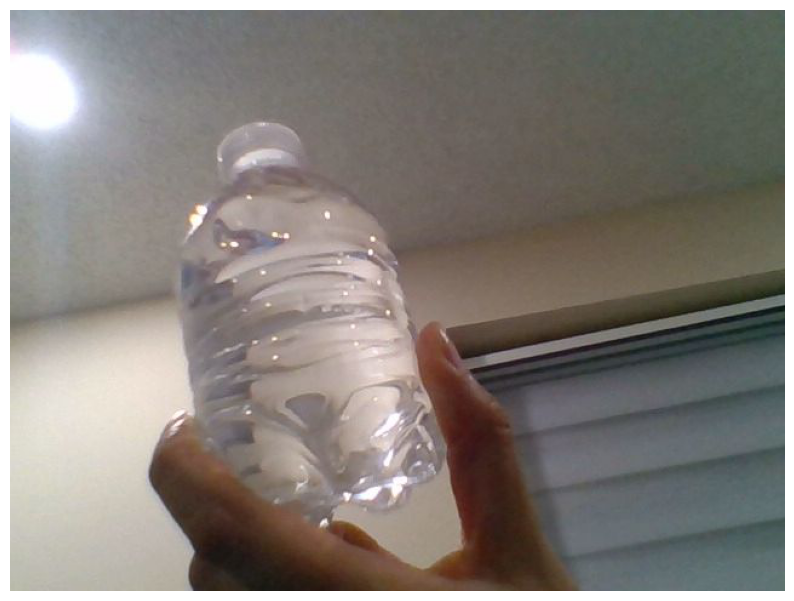

<ipython-input-62-9e68a88ca23f>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
im = imageio.imread('photo.jpg')
plot(im)
image = Image.fromarray(im) #convert to pil
img_tensor = preprocess(image)
img_tensor = img_tensor[None,:,:,:]
img_variable = torch.tensor(img_tensor).cuda(0)

In [ ]:
out = net(img_variable)

In [ ]:
label_index = out.cpu().data.numpy().argmax()

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
print(labels[label_index])

goblet


In [ ]:
for i in range(10):
    print(labels[top_list[i]])

goblet
shower cap
water bottle
plastic bag
nipple
spatula
vase
saltshaker, salt shaker
water jug
beaker


In [ ]:
prediction = predict_image_url(image_url, imageio.imread)

<ipython-input-49-da760378e0fc>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  output = model(img_tensor)


OSError: ignored

In [ ]:
print("The predicted class for the input image is:", prediction)

The predicted class for the input image is: Glass
